In [32]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from collections import Counter

# from sklearn.datasets import load_boston
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [33]:
df = pd.read_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/實價登錄房價_252720row_unitPrice_outlier_5percent_2024.csv')
plt.rcParams['font.family'] = 'Heiti TC'

In [34]:
df.shape

(252720, 57)

In [35]:
df.describe()

,建築完成年月,建物移轉總面積平方公尺,總價元,單價元平方公尺,緯度,經度,bad_count,good_count,陽台有無,是否含額外土地,...,交易年份,建築完成年,交易年_民國,屋齡,good_count_0_500,good_count_500_1000,good_count_1000_1500,bad_count_0_500,bad_count_500_1000,bad_count_1000_1500
count,2.223560e+05,252720.000000,2.527200e+05,252720.000000,252720.000000,252720.000000,252720.000000,252720.000000,252720.000000,252720.000000,...,252720.000000,252720.000000,252720.000000,252720.000000,252720.000000,252720.000000,252720.000000,252720.000000,252720.000000,252720.000000
mean,9.355253e+05,164.361783,8.941010e+06,54755.824205,23.040593,120.233754,5.015242,0.918154,0.750483,0.309726,...,2018.535799,82.250681,107.535799,25.285118,1.009817,2.634418,3.914411,5.498548,14.146783,22.200249
std,1.560433e+05,295.571918,1.412635e+07,23490.300024,0.096525,0.074487,6.717900,1.355926,0.432734,0.462382,...,3.436878,33.736158,3.436878,34.788071,1.371126,2.948413,4.443553,6.744141,14.088463,21.693184
min,0.000000e+00,0.760000,2.268800e+04,15516.000000,22.503404,120.054968,0.000000,0.000000,0.000000,0.000000,...,2012.000000,0.000000,101.000000,-7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.209230e+05,104.950000,4.500000e+06,37292.000000,22.985840,120.195653,1.000000,0.000000,1.000000,0.000000,...,2016.000000,75.000000,105.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,9.000000
50%,9.901270e+05,146.630000,7.230000e+06,50536.000000,23.012327,120.227973,4.000000,0.000000,1.000000,0.000000,...,2019.000000,89.000000,108.000000,16.000000,1.000000,2.000000,2.000000,4.000000,12.000000,17.000000
75%,1.070921e+06,188.722500,1.080000e+07,68762.000000,23.059030,120.260073,7.000000,1.000000,1.000000,1.000000,...,2021.000000,106.000000,110.000000,32.000000,1.000000,4.000000,6.000000,7.000000,18.000000,26.000000
max,1.130717e+06,57128.460000,2.100000e+09,121326.000000,35.676423,139.650027,100.000000,10.000000,1.000000,1.000000,...,2024.000000,113.000000,113.000000,113.000000,10.000000,18.000000,27.000000,101.000000,108.000000,156.000000


In [36]:
pd.set_option('display.max_rows', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252720 entries, 0 to 252719
Data columns (total 57 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   鄉鎮市區                  252720 non-null  object 
 1   土地位置建物門牌              252720 non-null  object 
 2   交易年月日                 252720 non-null  object 
 3   建築完成年月                222356 non-null  float64
 4   建物移轉總面積平方公尺           252720 non-null  float64
 5   有無管理組織                252720 non-null  object 
 6   總價元                   252720 non-null  int64  
 7   單價元平方公尺               252720 non-null  float64
 8   備註                    73809 non-null   object 
 9   編號                    252720 non-null  object 
 10  緯度                    252720 non-null  float64
 11  經度                    252720 non-null  float64
 12  bad_count             252720 non-null  float64
 13  good_count            252720 non-null  float64
 14  建築型態清整                252720 non-null  object 
 15  

In [37]:
print(df['有無管理組織'].unique())



# # 將 '有' 轉換為 1，'無' 轉換為 0，並處理 NaN 值
df['有無管理組織'] = df['有無管理組織'].map({'有': 1, '無': 0}).fillna(0)

# # 檢查轉換後的結果
print(df['有無管理組織'].head())


['有' '無']
0    1
1    0
2    0
3    1
4    1
Name: 有無管理組織, dtype: int64


In [38]:
# df.info()

In [39]:
df.isnull().sum()

鄉鎮市區                         0
土地位置建物門牌                     0
交易年月日                        0
建築完成年月                   30364
建物移轉總面積平方公尺                  0
有無管理組織                       0
總價元                          0
單價元平方公尺                      0
備註                      178911
編號                           0
緯度                           0
經度                           0
bad_count                    0
good_count                   0
建築型態清整                       0
陽台有無                         0
是否含額外土地                      0
建築型態_住商大樓                    0
建築型態_公寓                      0
建築型態_其他                      0
建築型態_透天厝                     0
房地總價元                        0
格局比例_房                       0
格局比例_廳                       0
格局比例_衛                       0
格局比例_隔間                      0
是否包含車位                       0
建材_磚石                        0
建材_鋼筋                        0
建材_鋼骨                        0
建材_竹木                        0
住                            0
商       

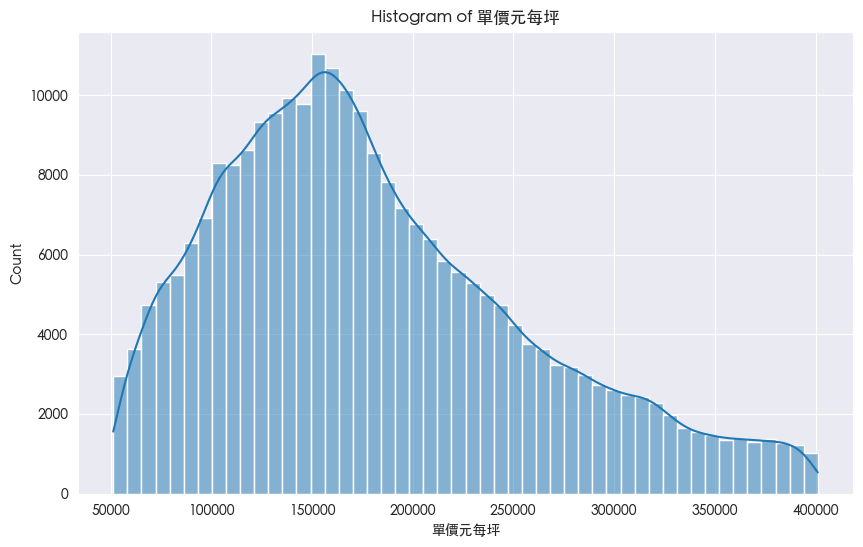

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df['單價元每坪'], bins=50, kde=True)
plt.title('Histogram of 單價元每坪')
plt.show()

1. 處理異常值（outliers）：

    min 為 0，這可能是異常數據，應考慮刪除或補充這些數據。
    max 值高達 70,565,880，這可能也是極端值。可以使用四分位距數據（如 Q1 和 Q3）來計算並排除異常值：
    使用 IQR（Q3 - Q1），範圍外的數據可以被視為異常值，通常為低於 Q1 - 1.5*IQR 或高於 Q3 + 1.5*IQR 的數據。
2. 處理零值：

    如果 min 為 0 是無效數據，可以考慮將這些值濾除或使用平均值、中位數等進行填補。
3. 資料分佈檢查與轉換：

    檢查數據的偏態（skewness）。若數據呈現強烈的右偏分佈（偏態值 > 1），可以考慮對 y 進行對數變換（log transformation），如 log(y + 1)，以減少異常高值的影響，使數據分佈更加正態，從而提升模型的效果。
4. 標準化（Normalization）或正規化（Normalization）：

    若使用對數變換，對於 y 這樣的目標變數通常無需進行標準化。但在進行一些模型（如正則化模型）時，標準化有時能幫助收斂速度更快。

In [41]:
print(df['單價元每坪'].describe())

count    252720.000000
mean     181010.982318
std       77653.881465
min       51292.560060
25%      123279.334220
50%      167061.150760
75%      227312.388170
max      401077.670910
Name: 單價元每坪, dtype: float64


### 偏態值為 0.69

In [42]:
from scipy.stats import skew
# 計算 [單價元每坪] 欄位的偏態
skewness = skew(df['單價元每坪'].dropna())  # 避免 NaN 影響偏態計算
print(f"[單價元每坪] 欄位的偏態: {skewness}")

[單價元每坪] 欄位的偏態: 0.6965747217849009


In [43]:
df.columns

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '建築完成年月', '建物移轉總面積平方公尺', '有無管理組織', '總價元',
       '單價元平方公尺', '備註', '編號', '緯度', '經度', 'bad_count', 'good_count', '建築型態清整',
       '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝',
       '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位', '建材_磚石',
       '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓', '移轉層次_屋頂',
       '移轉層次_一二樓', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', '有無電梯', 'Region',
       '建物移轉總面積坪', '單價元每坪', '房地總價元(坪)', '交易年份', '建築完成年', '交易年_民國', '屋齡',
       '屋齡區間', 'good_count_0_500', 'good_count_500_1000',
       'good_count_1000_1500', 'bad_count_0_500', 'bad_count_500_1000',
       'bad_count_1000_1500'],
      dtype='object')

## 分類欄位
- 建築型態：'建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝'
- 格局比例：'格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間'（佔比）
- 建材：'建材_磚石','建材_鋼筋', '建材_鋼骨', '建材_竹木'
- 土地用途：'住', '商', '工', '農'
- 移轉層次：'移轉層次_騎樓', '移轉層次_屋頂','移轉層次_一二樓'
- 屋齡：'屋齡區間'
- 好物設施：'good_count_0_500', 'good_count_500_1000','good_count_1000_1500', 'bad_count_0_500', 'bad_count_500_1000','bad_count_1000_1500'
## 有無欄位
- '有無管理組織'
- '陽台有無'
- '是否含額外土地'
- '是否包含車位'
- '有無電梯'
## 其他
- '交易年份
- ~'屋齡'~
- '房地總價元(坪)'
- '建物移轉總面積坪'

In [44]:
# 查看這些欄位的統計描述
print(df[['格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間']].describe())


              格局比例_房         格局比例_廳         格局比例_衛        格局比例_隔間
count  252720.000000  252720.000000  252720.000000  252720.000000
mean        0.372397       0.216548       0.282207       0.127349
std         0.071949       0.072966       0.078306       0.057260
min         0.000000       0.000000       0.000000       0.000000
25%         0.333333       0.181818       0.250000       0.090909
50%         0.375000       0.222222       0.272727       0.125000
75%         0.400000       0.250000       0.333333       0.142857
max         1.000000       1.000000       1.000000       1.000000


In [45]:
df['比例總和'] = df['格局比例_房'] + df['格局比例_廳'] + df['格局比例_衛'] + df['格局比例_隔間']
print(df['比例總和'].describe())


count    252720.000000
mean          0.998501
std           0.037718
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: 比例總和, dtype: float64


In [46]:
# 創建一個函數，根據 One-Hot 編碼欄位的值返回類別標籤
def get_building_type(row):
    if row['移轉層次_騎樓'] == 1:
        return '騎樓'
    elif row['移轉層次_屋頂'] == 1:
        return '屋頂'
    elif row['移轉層次_一二樓'] == 1:
        return '一二樓'
    else:
        return '未知'

# 應用函數，創建新的類別型欄位
df['移轉層次'] = df.apply(get_building_type, axis=1)



In [47]:
# 創建一個函數，根據 One-Hot 編碼欄位的值返回類別標籤
def get_building_type(row):
    if row['建築型態_住商大樓'] == 1:
        return '住商大樓'
    elif row['建築型態_公寓'] == 1:
        return '公寓'
    elif row['建築型態_透天厝'] == 1:
        return '透天厝'
    elif row['建築型態_其他'] == 1:
        return '其他'
    else:
        return '未知'

# 應用函數，創建新的類別型欄位
df['建築型態'] = df.apply(get_building_type, axis=1)



In [48]:
# 定義函數，根據 One-Hot 編碼欄位返回建材類別
def get_material_type(row):
    if row['建材_磚石'] == 1:
        return '磚石'
    elif row['建材_鋼筋'] == 1:
        return '鋼筋'
    elif row['建材_鋼骨'] == 1:
        return '鋼骨'
    elif row['建材_竹木'] == 1:
        return '竹木'
    else:
        return '未知'  # 處理可能的缺失值或異常值

# 應用函數，創建新的類別型欄位
df['建材種類'] = df.apply(get_material_type, axis=1)



In [49]:
# 定義函數，根據 One-Hot 編碼欄位返回土地用途類別
def get_land_use_type(row):
    if row['住'] == 1:
        return '住'
    elif row['商'] == 1:
        return '商'
    elif row['工'] == 1:
        return '工'
    elif row['農'] == 1:
        return '農'
    else:
        return '未知'  # 處理可能的缺失值或異常值

# 應用函數，創建新的類別型欄位
df['土地用途'] = df.apply(get_land_use_type, axis=1)




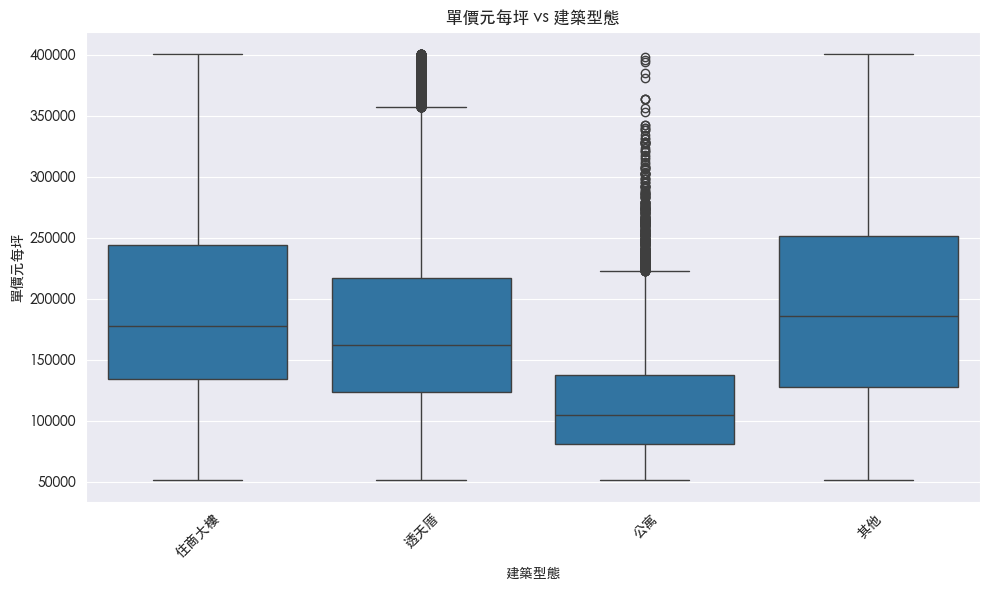

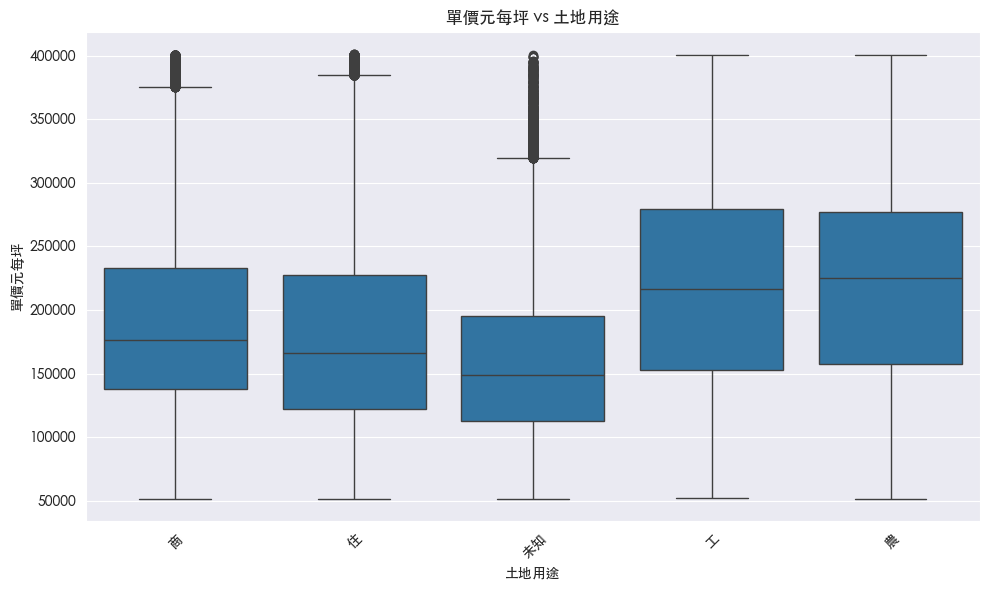

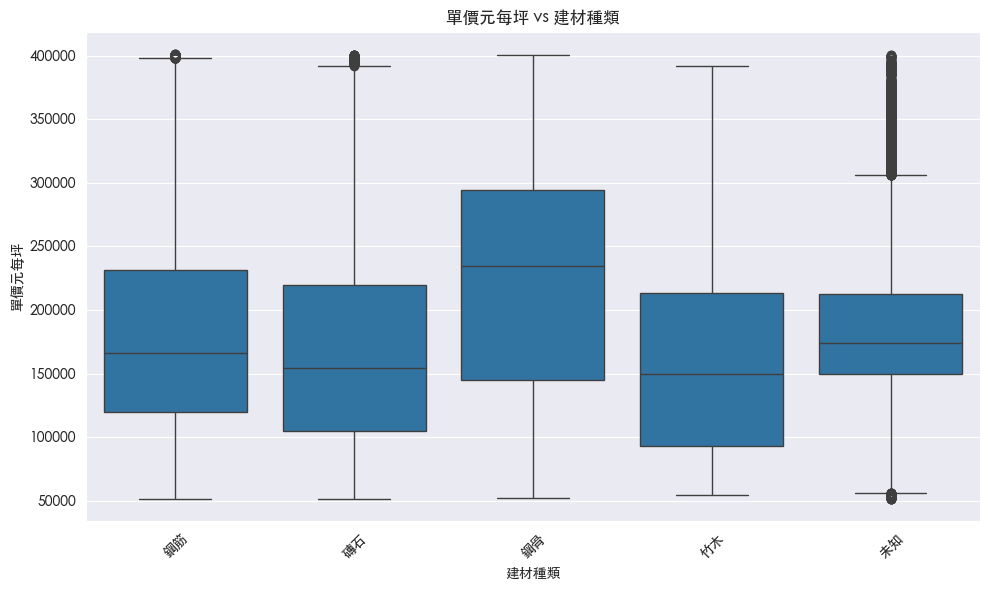

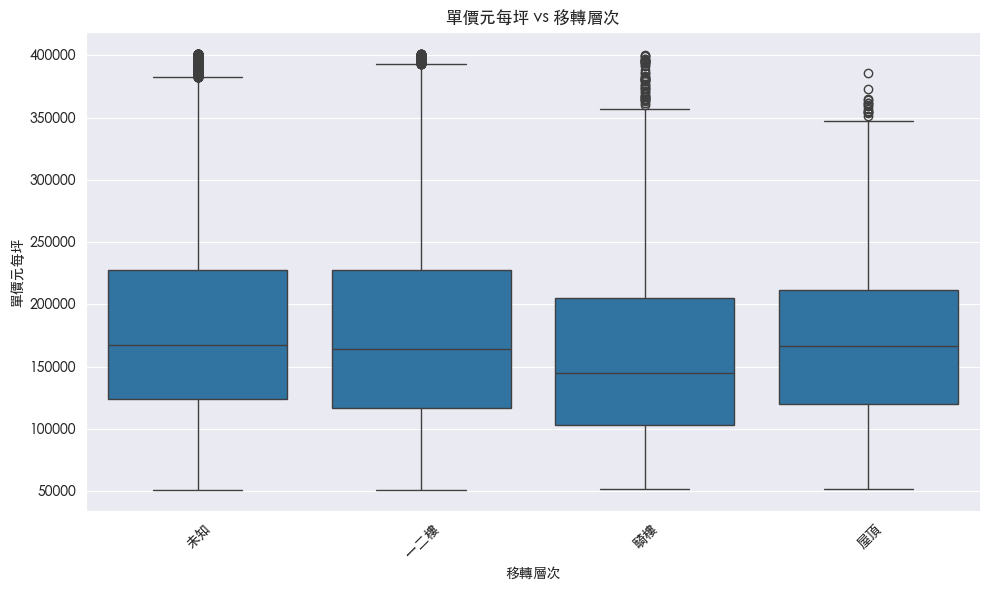

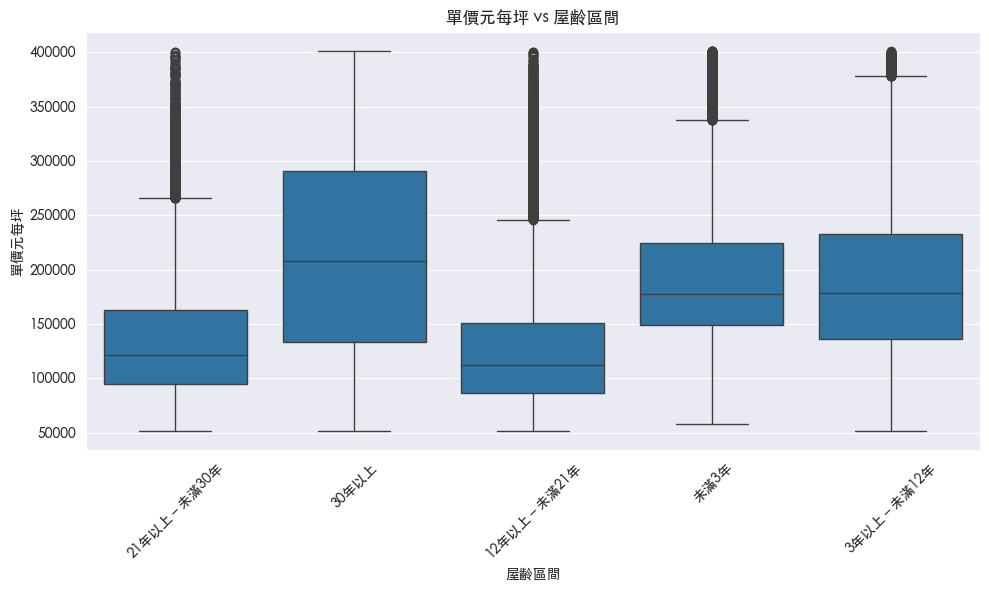

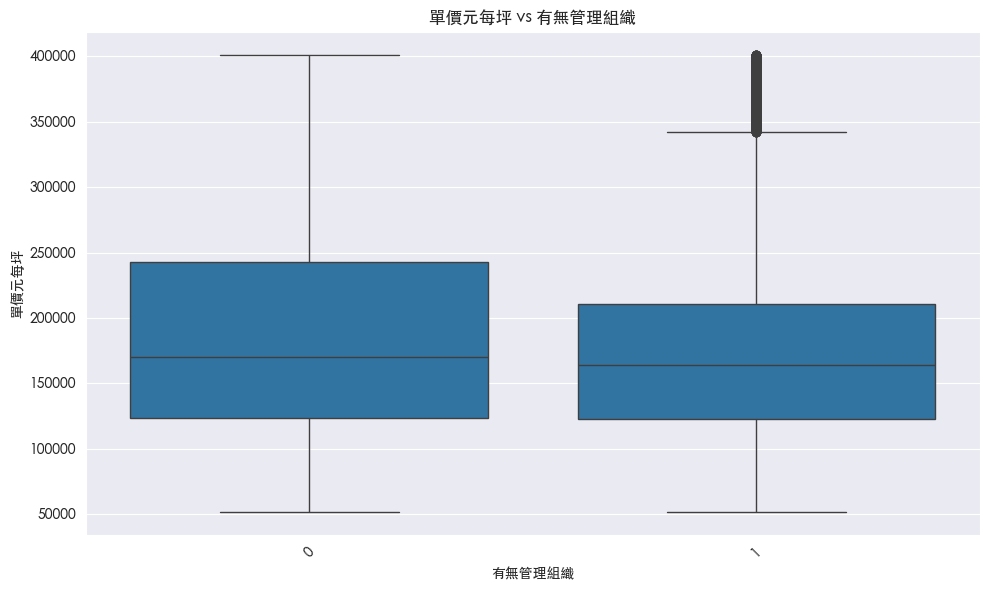

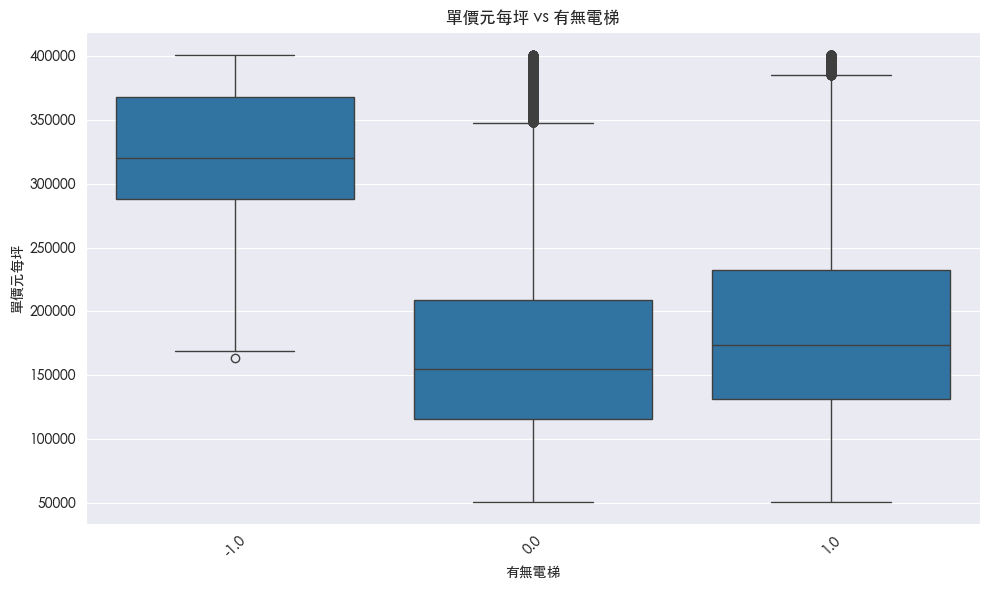

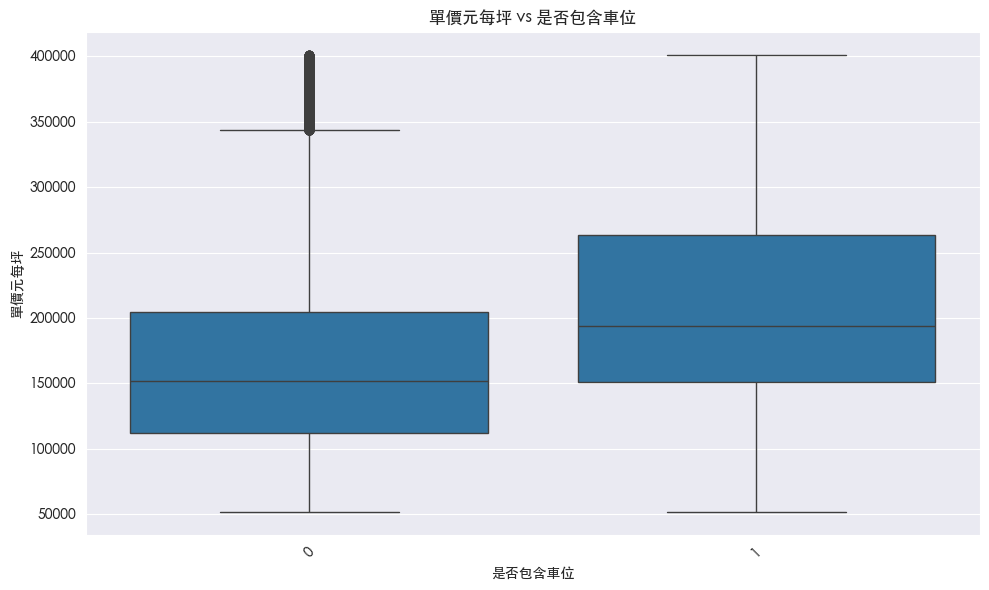

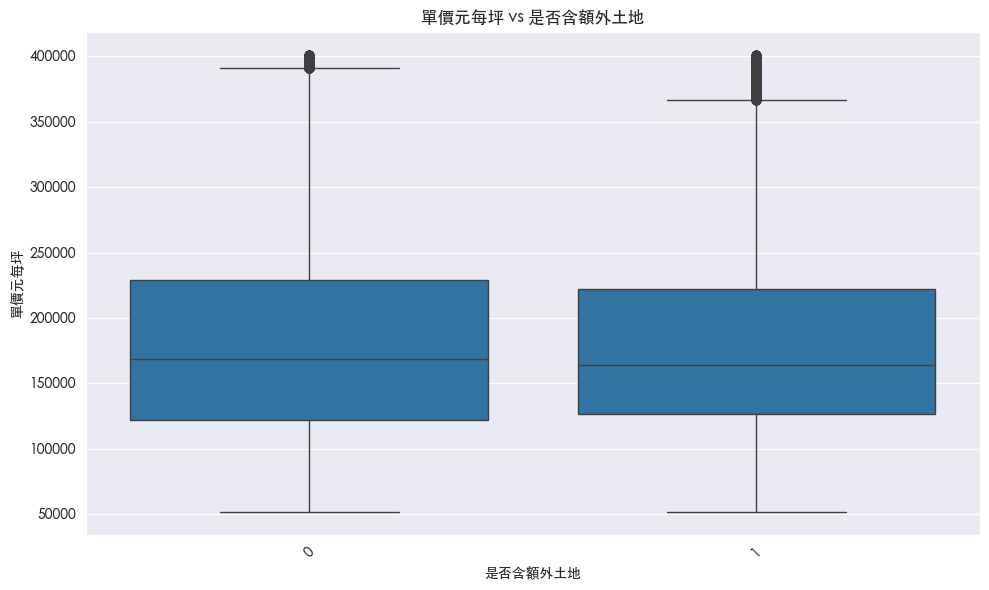

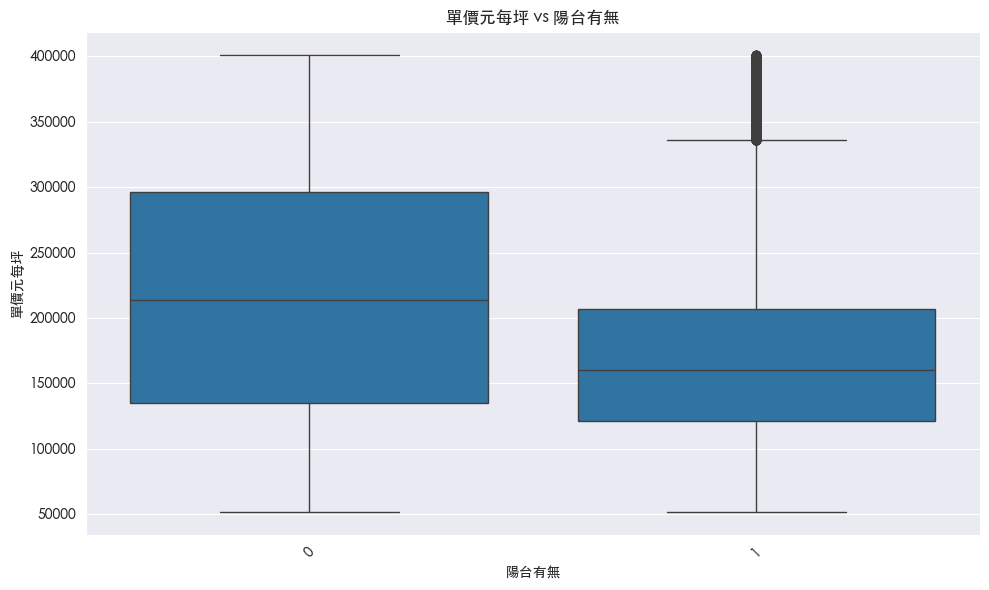

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# 定義需要比較的分類變數
categorical_vars = [
    '建築型態', '土地用途','建材種類','移轉層次','屋齡區間','有無管理組織', '有無電梯', '是否包含車位', '是否含額外土地','陽台有無'
]

# 遍歷每個分類變數，繪製對應的 Boxplot
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=var, y='單價元每坪')
    plt.title(f'單價元每坪 vs {var}')
    plt.xlabel(var)
    plt.ylabel('單價元每坪')
    plt.xticks(rotation=45)  # 如果分類變數有多個類別，可以選擇旋轉 x 軸標籤
    plt.tight_layout()
    plt.show()
    



In [51]:
value = df['建材種類'].unique()
value

array(['鋼筋', '磚石', '鋼骨', '竹木', '未知'], dtype=object)

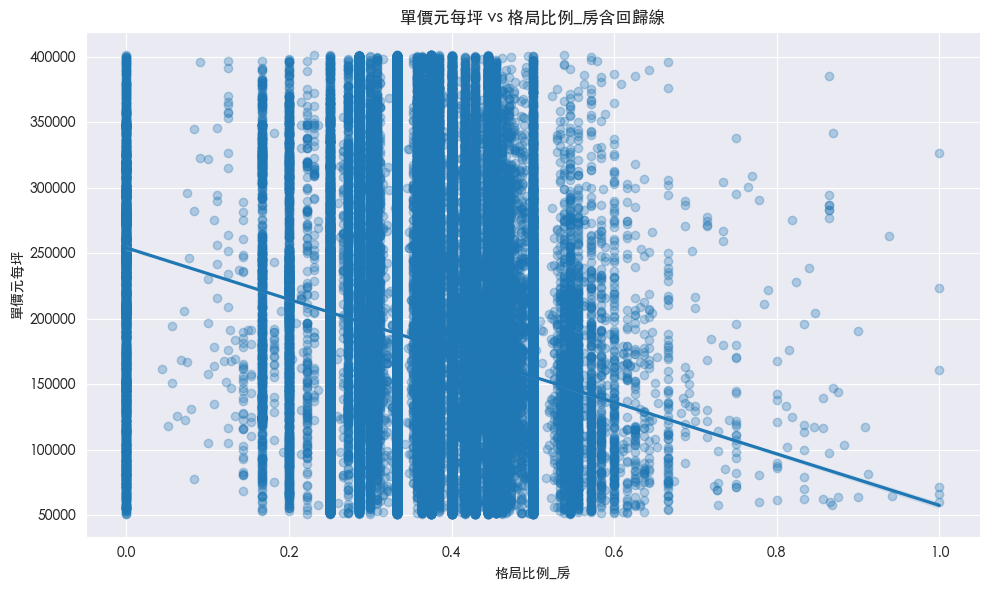

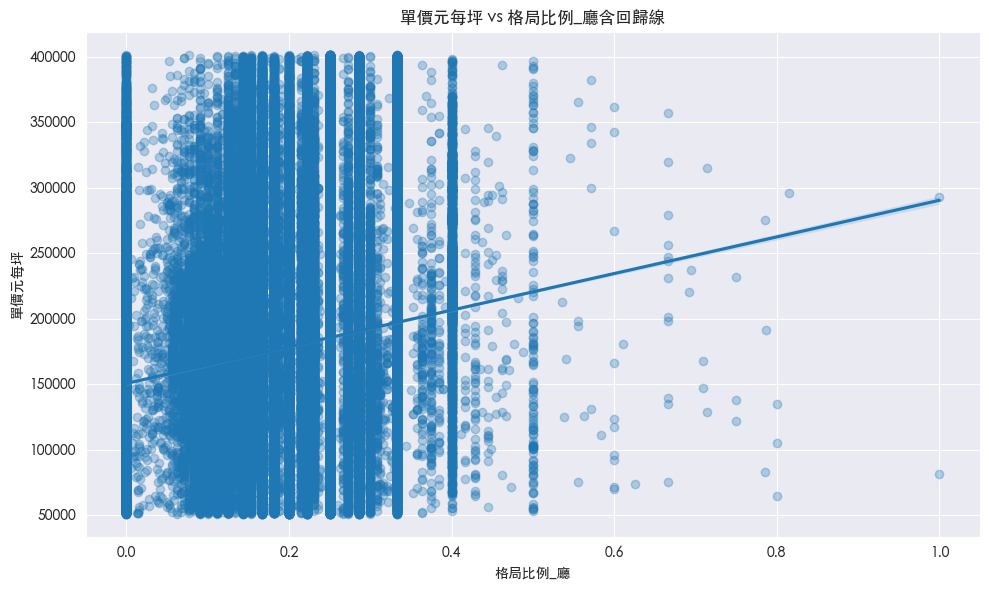

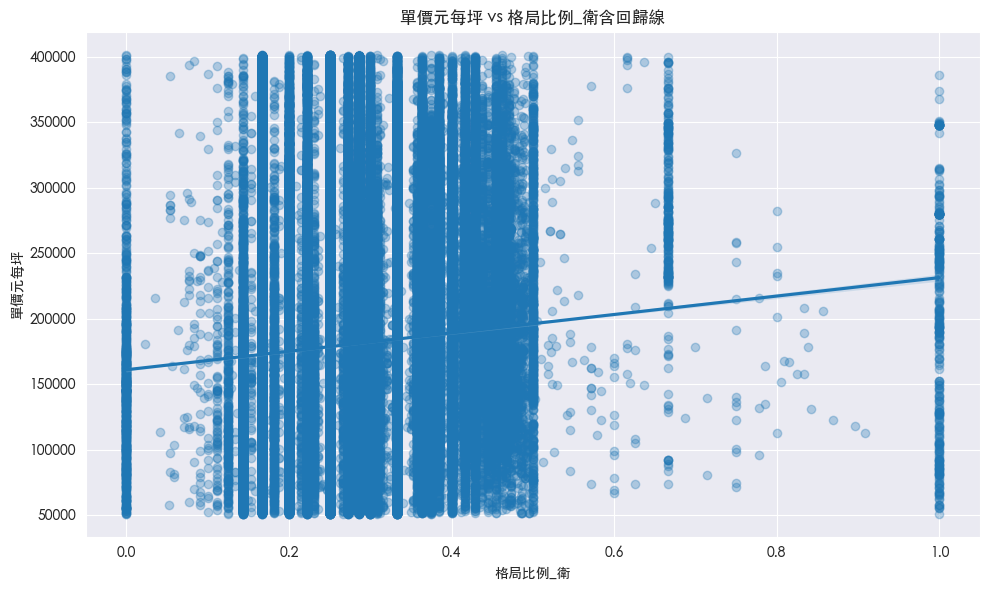

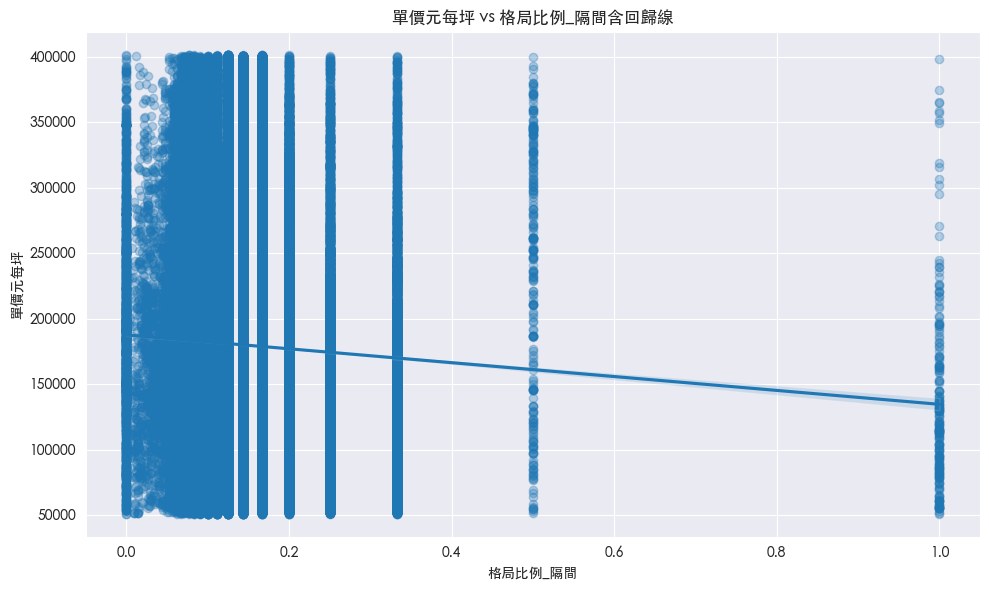

In [52]:

# 定义需要绘制的数值变量
numerical_vars = ['格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間']

# # 数据类型转换
# df[numerical_vars] = df[numerical_vars].astype(float)
# df['單價元每坪'] = df['單價元每坪'].astype(float)

# # 删除缺失值
# df_clean = df.dropna(subset=numerical_vars + ['單價元每坪'])

# 遍历每个数值变量，绘制对应的回归图
for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.regplot(data=df, x=var, y='單價元每坪', scatter_kws={'alpha':0.3})
    plt.title(f'單價元每坪 vs {var}含回歸線')
    plt.xlabel(var)
    plt.ylabel('單價元每坪')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



In [53]:
yearly_avg_price = df.groupby('交易年份')['單價元每坪'].mean().reset_index()
yearly_avg_price 

,交易年份,單價元每坪
0,2012,117118.120228
1,2013,123505.932115
2,2014,135953.780953
3,2015,139777.534613
4,2016,144299.856279
5,2017,150848.552734
6,2018,157156.260167
7,2019,165437.506424
8,2020,185616.709860
9,2021,207718.593413


1. 過濾極端值： 可以在繪圖之前過濾掉一些過高或過低的個別交易價格，比如使用百分位數過濾。

2. 調整y軸縮放： 在 plt.yscale('log') 中使用對數尺度，以便更直觀地觀察數據變化。

3. 檢查平均值計算： 確認年度平均單價的計算方法，確保是基於合理範圍內的數據進行平均。

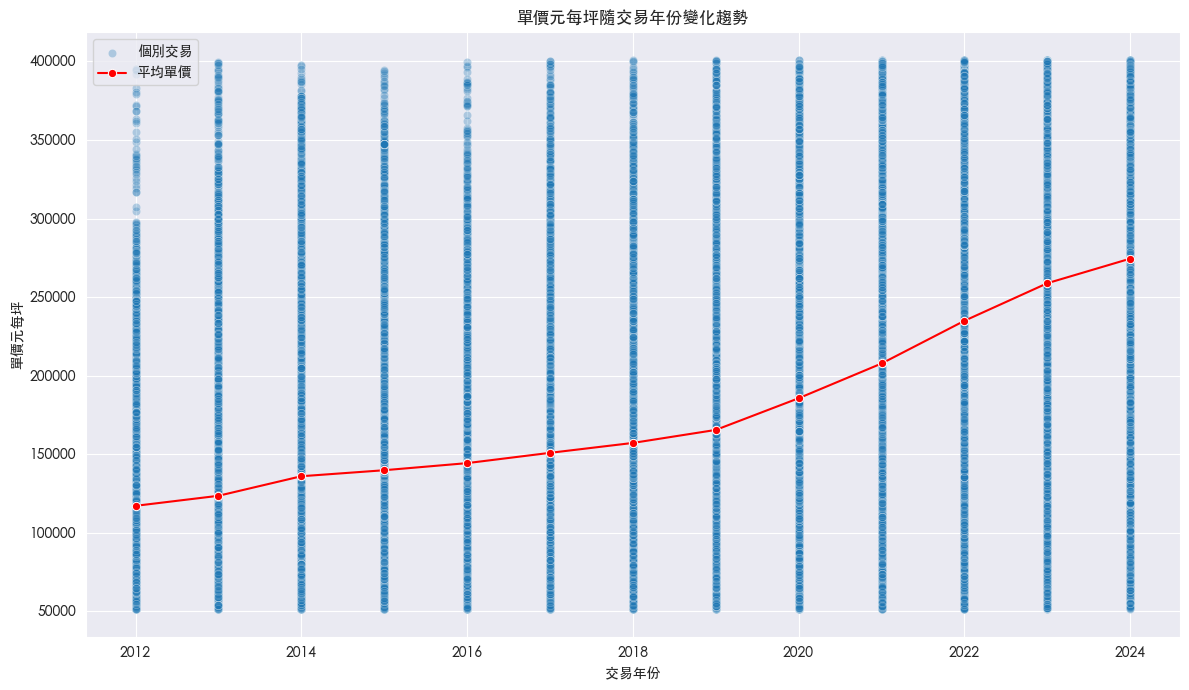

In [54]:
yearly_avg_price = df.groupby('交易年份')['單價元每坪'].mean().reset_index()
plt.figure(figsize=(12, 7))

# 绘制散点图
sns.scatterplot(data=df, x='交易年份', y='單價元每坪', alpha=0.3, label='個別交易')

# 绘制年度平均单价的折线图
sns.lineplot(data=yearly_avg_price, x='交易年份', y='單價元每坪', marker='o', color='red', label='平均單價')

plt.title('單價元每坪隨交易年份變化趨勢')
plt.xlabel('交易年份')
plt.ylabel('單價元每坪')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<!-- # count_vars = [
#     'good_count_0_500', 'good_count_500_1000', 'good_count_1000_1500',
#     'bad_count_0_500', 'bad_count_500_1000', 'bad_count_1000_1500'
# ]


# for var in count_vars:
#     plt.figure(figsize=(10, 6))
#     sns.kdeplot(
#         data=df,
#         x=var,
#         y='單價元每坪',
#         cmap="Blues",
#         shade=True,
#         thresh=0.05
#     )
#     plt.title(f'單價元每坪 vs {var}（核密度图）')
#     plt.xlabel(var)
#     plt.ylabel('單價元每坪')
#     plt.tight_layout()
#     plt.show() -->

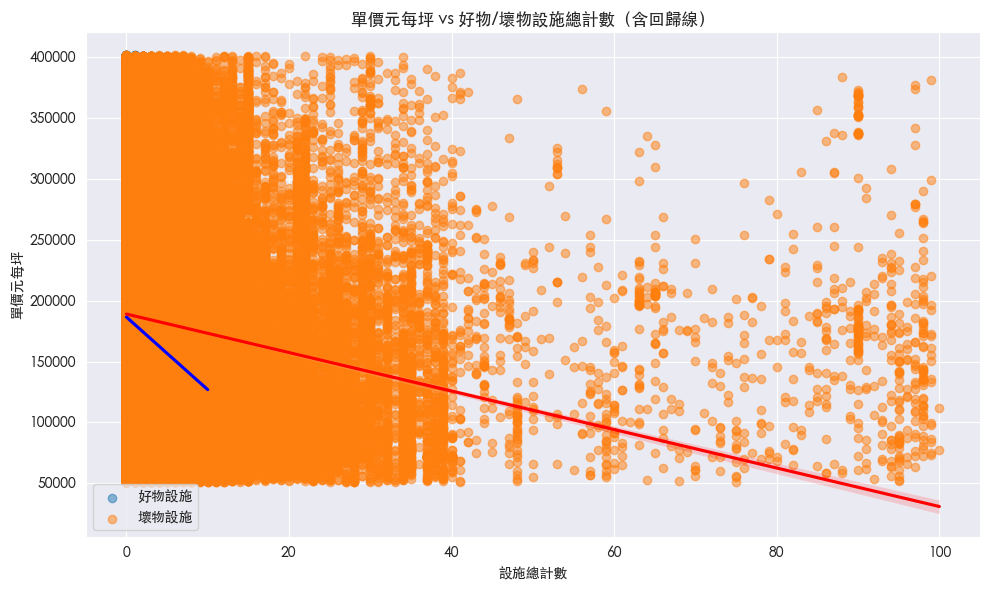

In [55]:

# 绘制散点图和回归线
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='good_count',
    y='單價元每坪',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'blue'},
    label='好物設施'
)
sns.regplot(
    data=df,
    x='bad_count',
    y='單價元每坪',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'},
    label='壞物設施'
)
plt.title('單價元每坪 vs 好物/壞物設施總計數（含回歸線）')
plt.xlabel('設施總計數')
plt.ylabel('單價元每坪')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

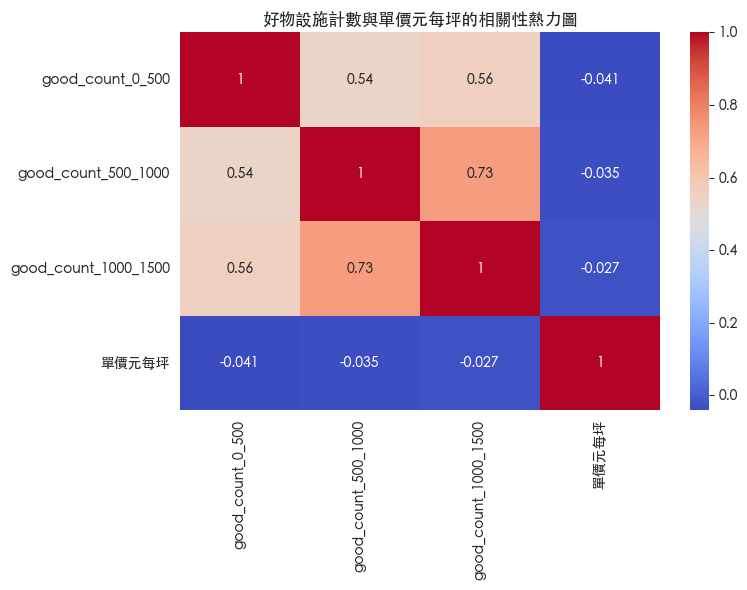

In [56]:
# 选择需要绘制的变量
heatmap_vars = ['good_count_0_500', 'good_count_500_1000', 'good_count_1000_1500', '單價元每坪']

# 计算相关性矩阵
corr = df[heatmap_vars].corr()

# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('好物設施計數與單價元每坪的相關性熱力圖')
plt.tight_layout()
plt.show()

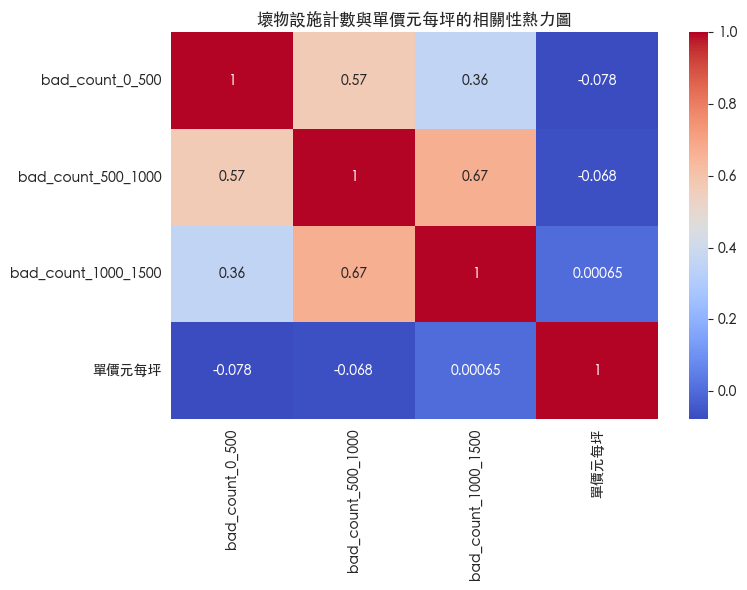

In [57]:
# 选择需要绘制的变量
heatmap_vars = ['bad_count_0_500', 'bad_count_500_1000', 'bad_count_1000_1500', '單價元每坪']

# 计算相关性矩阵
corr = df[heatmap_vars].corr()

# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('壞物設施計數與單價元每坪的相關性熱力圖')
plt.tight_layout()
plt.show()

In [58]:
df.columns

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '建築完成年月', '建物移轉總面積平方公尺', '有無管理組織', '總價元',
       '單價元平方公尺', '備註', '編號', '緯度', '經度', 'bad_count', 'good_count', '建築型態清整',
       '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝',
       '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位', '建材_磚石',
       '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓', '移轉層次_屋頂',
       '移轉層次_一二樓', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', '有無電梯', 'Region',
       '建物移轉總面積坪', '單價元每坪', '房地總價元(坪)', '交易年份', '建築完成年', '交易年_民國', '屋齡',
       '屋齡區間', 'good_count_0_500', 'good_count_500_1000',
       'good_count_1000_1500', 'bad_count_0_500', 'bad_count_500_1000',
       'bad_count_1000_1500', '比例總和', '移轉層次', '建築型態', '建材種類', '土地用途'],
      dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252720 entries, 0 to 252719
Data columns (total 62 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   鄉鎮市區                  252720 non-null  object 
 1   土地位置建物門牌              252720 non-null  object 
 2   交易年月日                 252720 non-null  object 
 3   建築完成年月                222356 non-null  float64
 4   建物移轉總面積平方公尺           252720 non-null  float64
 5   有無管理組織                252720 non-null  int64  
 6   總價元                   252720 non-null  int64  
 7   單價元平方公尺               252720 non-null  float64
 8   備註                    73809 non-null   object 
 9   編號                    252720 non-null  object 
 10  緯度                    252720 non-null  float64
 11  經度                    252720 non-null  float64
 12  bad_count             252720 non-null  float64
 13  good_count            252720 non-null  float64
 14  建築型態清整                252720 non-null  object 
 15  

## Lasso 和 Ridge 回歸：
- 需要特徵縮放：這兩種回歸方法對變數的尺度敏感，因為正則化項會受到特徵值大小的影響。特徵縮放有助於模型更快收斂，並確保正則化項對各變數的影響一致。
- 需要對類別型變數進行編碼：一般使用 One-Hot Encoding，並避免對編碼後的變數進行標準化。
- 需要處理缺失值：這些模型不能接受缺失值，需要在建模前對缺失值進行填補或刪除。


In [60]:
from sklearn.preprocessing import StandardScaler
# 定義目標變數 y
y = df['單價元每坪']

# 定義特徵變數 X，排除目標變數和不必要的欄位
X = df.drop(columns=['單價元每坪', '編號', '備註', '鄉鎮市區', '土地位置建物門牌', '交易年月日',
                     '建築完成年月', '建物移轉總面積平方公尺', 'Region', '緯度', '經度','單價元平方公尺','總價元',
                     '建築型態清整', '房地總價元', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km',
                     'Region', '交易年_民國', '移轉層次', '建築型態', '建材種類', '土地用途','屋齡區間'])

# 移除包含缺失值的列
X = X.dropna()
y = y.loc[X.index]  # 確保 y 與 X 的索引對齊

# 如果有類別型變數需要處理，請在此處進行 One-Hot Encoding（依照之前的步驟）

# 劃分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

# 列出數值型變數
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# 找出需要標準化的連續型變數（取值不只有 0 和 1）
continuous_cols = [col for col in numeric_cols if X[col].nunique() > 2]

# 初始化標準化器
scaler = StandardScaler()

# 在訓練集上擬合並轉換
X_train_scaled_continuous = scaler.fit_transform(X_train[continuous_cols])

# 在測試集上轉換
X_test_scaled_continuous = scaler.transform(X_test[continuous_cols])

# 將縮放後的資料轉換為 DataFrame
X_train_scaled_continuous = pd.DataFrame(X_train_scaled_continuous, columns=continuous_cols, index=X_train.index)
X_test_scaled_continuous = pd.DataFrame(X_test_scaled_continuous, columns=continuous_cols, index=X_test.index)

# 從原始資料中移除連續型變數，保留類別型變數（包括 One-Hot 編碼的變數）
X_train_categorical = X_train.drop(columns=continuous_cols)
X_test_categorical = X_test.drop(columns=continuous_cols)

# 合併標準化後的連續型變數和未經標準化的類別型變數
X_train_scaled = pd.concat([X_train_scaled_continuous, X_train_categorical], axis=1)
X_test_scaled = pd.concat([X_test_scaled_continuous, X_test_categorical], axis=1)

# 現在可以使用 X_train_scaled 和 y_train 進行模型訓練


In [61]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

# 初始化模型
lasso = Lasso(alpha=1.0)
ridge = Ridge(alpha=1.0)

# 訓練模型
lasso.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)

# 預測
y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)

# 評估模型
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Lasso 回歸的均方誤差：{mse_lasso}")
print(f"Ridge 回歸的均方誤差：{mse_ridge}")


Lasso 回歸的均方誤差：2347661956.2782784
Ridge 回歸的均方誤差：2347704707.3731937


In [62]:
from sklearn.model_selection import GridSearchCV

# 使用 GridSearchCV 來尋找最佳的 alpha 值
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print(f"最佳的 alpha: {grid_search.best_params_['alpha']}")
print(f"最佳模型的 R2_score (train): {grid_search.best_score_}")

# 使用最佳參數重新訓練模型
best_alpha = grid_search.best_params_['alpha']
ridgeReg = Ridge(alpha=best_alpha)
ridgeReg.fit(X_train, y_train)


最佳的 alpha: 0.01
最佳模型的 R2_score (train): 0.5766158084115949


Ridge(alpha=0.01)

In [63]:
# 實例化 Ridge 模型，這裡的 alpha 是正則化強度，可以根據需要調整
ridgeReg = Ridge(alpha=0.01)

# 訓練 Ridge 模型
ridgeReg.fit(X_train, y_train)


Ridge(alpha=0.01)

In [64]:
# 預測訓練集和測試集
y_pred_ridge_train = ridgeReg.predict(X_train)
y_pred_ridge_test = ridgeReg.predict(X_test)
# 計算 R2（決定係數）和 RMSE（均方根誤差）
r2_score_ridge_train = ridgeReg.score(X_train, y_train)
r2_score_ridge_test = ridgeReg.score(X_test, y_test)

rmse_ridge_train = np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))
rmse_ridge_test = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))

# 打印結果
print(f"R2_score (train): {r2_score_ridge_train}")
print(f"R2_score (test): {r2_score_ridge_test}")
print(f"RMSE (train): {rmse_ridge_train}")
print(f"RMSE (test): {rmse_ridge_test}")


R2_score (train): 0.6005444429939625
R2_score (test): 0.6085012234695072
RMSE (train): 49137.22197977381
RMSE (test): 48453.157755811386


## LinearRegression

In [65]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [66]:
from sklearn.metrics import r2_score

# R2 score，即決定係數，反映Y的全部變異能通過迴歸關係被所有X解釋的比例。
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# RMSE一般指均方根誤差(標準誤差)，可衡量預測值和實際值之間的平均差異，藉此估計預測模型預測目標值的準確度
rmse_train = (np.sqrt(mean_squared_error(y_train, y_pred_linear_train)))
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))

print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_train)
print("RMSE: ", rmse_test)

R2_score (train):  0.6005444429967051
R2_score (test):  0.6085011750102105
RMSE:  49137.22197960513
RMSE:  48453.160754551114


## 隨機森林
- 不需要特徵縮放：隨機森林是基於決策樹的模型，決策樹通過對特徵進行分割來做決策，對變數的尺度不敏感。因此，對數值型變數進行標準化或歸一化通常不是必須的。
- 可以直接處理類別型變數：如果使用能夠處理類別型變數的實現（如某些 Python 的隨機森林套件），可以直接使用 Label Encoding。
- One-Hot Encoding 的影響：雖然隨機森林可以處理 One-Hot 編碼的變數，但過多的 One-Hot 編碼變數可能會增加模型的複雜度，影響性能。
可以部分處理缺失值：某些隨機森林實現可以處理缺失值，但為了提高模型性能，建議仍然對缺失值進行處理。

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252720 entries, 0 to 252719
Data columns (total 62 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   鄉鎮市區                  252720 non-null  object 
 1   土地位置建物門牌              252720 non-null  object 
 2   交易年月日                 252720 non-null  object 
 3   建築完成年月                222356 non-null  float64
 4   建物移轉總面積平方公尺           252720 non-null  float64
 5   有無管理組織                252720 non-null  int64  
 6   總價元                   252720 non-null  int64  
 7   單價元平方公尺               252720 non-null  float64
 8   備註                    73809 non-null   object 
 9   編號                    252720 non-null  object 
 10  緯度                    252720 non-null  float64
 11  經度                    252720 non-null  float64
 12  bad_count             252720 non-null  float64
 13  good_count            252720 non-null  float64
 14  建築型態清整                252720 non-null  object 
 15  

In [68]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
# 定義目標變數 y
y = df['單價元每坪']

# 定義要移除的欄位
columns_to_drop = [
    '單價元每坪', '編號', '備註', '鄉鎮市區', '土地位置建物門牌', '交易年月日',
    '建築完成年月', '建物移轉總面積平方公尺', 'Region', '緯度', '經度',
    '建築型態清整', '房地總價元', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km',
    '交易年_民國', '單價元平方公尺','總價元',
    # 已經 One-Hot 編碼且類別型態為 object 的欄位
    '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝',
    '建材_磚石', '建材_鋼筋', '建材_鋼骨', '建材_竹木',
    '住', '商', '工', '農',
    '移轉層次_騎樓', '移轉層次_屋頂', '移轉層次_一二樓', '屋齡'
]

# 定義特徵變數 X，移除目標變數和不必要的欄位
X = df.drop(columns=columns_to_drop)

# # 檢查缺失值
# print("缺失值統計：")
# print(X.isnull().sum())

# 移除包含缺失值的列
X = X.dropna()
y = y.loc[X.index]  # 確保 y 與 X 的索引對齊

# 找出類別型變數
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print("需要處理的類別型變數：", categorical_cols)

# 分離低基數和高基數的類別型變數
low_cardinality_cols = [col for col in categorical_cols if X[col].nunique() < 10]
high_cardinality_cols = [col for col in categorical_cols if X[col].nunique() >= 10]

print("低基數的類別型變數（使用 One-Hot Encoding）：", low_cardinality_cols)
print("高基數的類別型變數（使用 Label Encoding）：", high_cardinality_cols)

# 對低基數的類別型變數進行 One-Hot Encoding
X = pd.get_dummies(X, columns=low_cardinality_cols)

# 初始化 Label Encoder
label_encoder = LabelEncoder()

# 對高基數的類別型變數進行 Label Encoding
for col in high_cardinality_cols:
    X[col] = label_encoder.fit_transform(X[col])

# 劃分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

# 初始化隨機森林模型
rf = RandomForestRegressor(n_estimators=100, random_state=25)

# 訓練模型
rf.fit(X_train, y_train)

# 預測
y_pred = rf.predict(X_test)

# 評估模型性能
mse = mean_squared_error(y_test, y_pred)
print(f"隨機森林模型的均方誤差（MSE）：{mse}")


需要處理的類別型變數： ['屋齡區間', '移轉層次', '建築型態', '建材種類', '土地用途']
低基數的類別型變數（使用 One-Hot Encoding）： ['屋齡區間', '移轉層次', '建築型態', '建材種類', '土地用途']
高基數的類別型變數（使用 Label Encoding）： []
隨機森林模型的均方誤差（MSE）：6723249.067936687


Feature importance ranking
特徵重要性：
房地總價元(坪)                5.991685e-01
建物移轉總面積坪                2.696158e-01
交易年份                    9.947525e-02
建築完成年                   2.482188e-02
格局比例_隔間                 4.261763e-03
建築型態_住商大樓               1.178518e-03
建材種類_未知                 2.235044e-04
建材種類_鋼筋                 1.590041e-04
bad_count_1000_1500     1.346264e-04
bad_count_500_1000      1.057361e-04
格局比例_房                  9.464401e-05
格局比例_衛                  8.176249e-05
格局比例_廳                  7.539659e-05
bad_count_0_500         7.157043e-05
good_count_1000_1500    6.728318e-05
bad_count               5.980035e-05
good_count_500_1000     5.703057e-05
土地用途_住                  4.209284e-05
good_count              2.823363e-05
good_count_0_500        2.654729e-05
是否含額外土地                 2.539475e-05
建築型態_其他                 2.045568e-05
建材種類_鋼骨                 1.775838e-05
陽台有無                    1.611481e-05
比例總和                    1.480532e-05
土地用途_未知                 1.370076e-05
有無管理

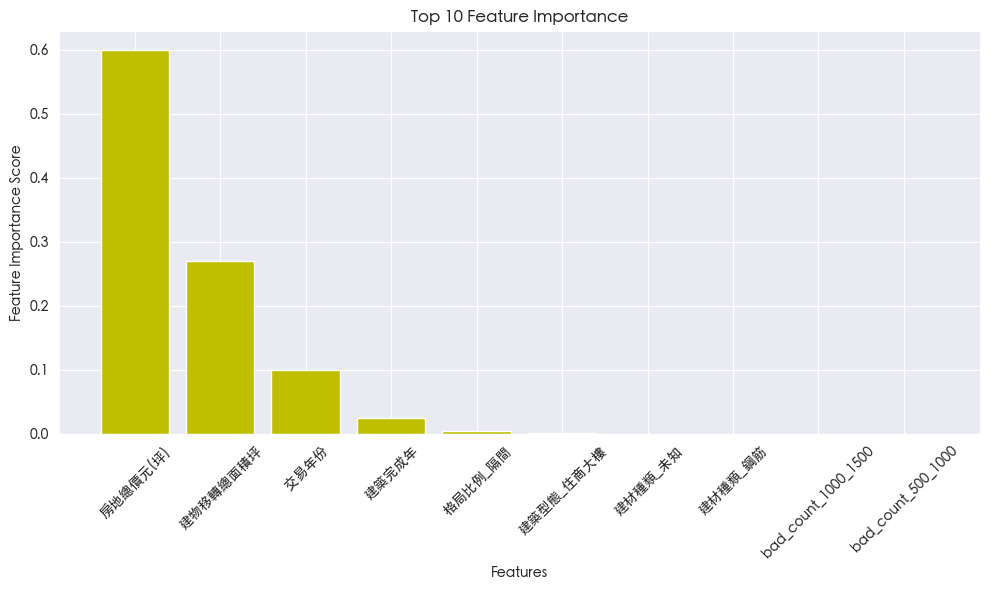

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# 確保已經訓練了隨機森林模型 rf

print('Feature importance ranking')

# 獲取特徵重要性
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)

# 按重要性排序
feature_importances.sort_values(ascending=False, inplace=True)

print("特徵重要性：")
print(feature_importances)

# 取出前 10 個特徵及其重要性
top_n = 10
top_features = feature_importances.index[:top_n]
top_importances = feature_importances.values[:top_n]

# 繪製前 10 個特徵的重要性圖
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importance')
plt.bar(top_features, top_importances, color='y', align='center')
plt.xticks(rotation=45)
plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.tight_layout()
plt.show()


In [70]:
from sklearn.metrics import mean_squared_error, r2_score

# 預測與評估
y_pred_rf_train = rf.predict(X_train)
y_pred_rf_test = rf.predict(X_test)

# 計算 R^2 分數
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# 計算 RMSE
rmse_rf_train = np.sqrt(mean_squared_error(y_train, y_pred_rf_train))
rmse_rf_test = np.sqrt(mean_squared_error(y_test, y_pred_rf_test))

# 輸出結果
print(f"R2_score (train): {r2_score_rf_train}")
print(f"R2_score (test): {r2_score_rf_test}")
print(f"RMSE (train): {rmse_rf_train}")
print(f"RMSE (test): {rmse_rf_test}")


R2_score (train): 0.9998249821972949
R2_score (test): 0.9988788455686384
RMSE (train): 1028.5312217578057
RMSE (test): 2592.922881216618


所有特征都已存在于 df 中。
选取的前 10 个特征： ['有無管理組織', 'bad_count', 'good_count', '陽台有無', '是否含額外土地', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位']
所有特征都已存在于 df 中。


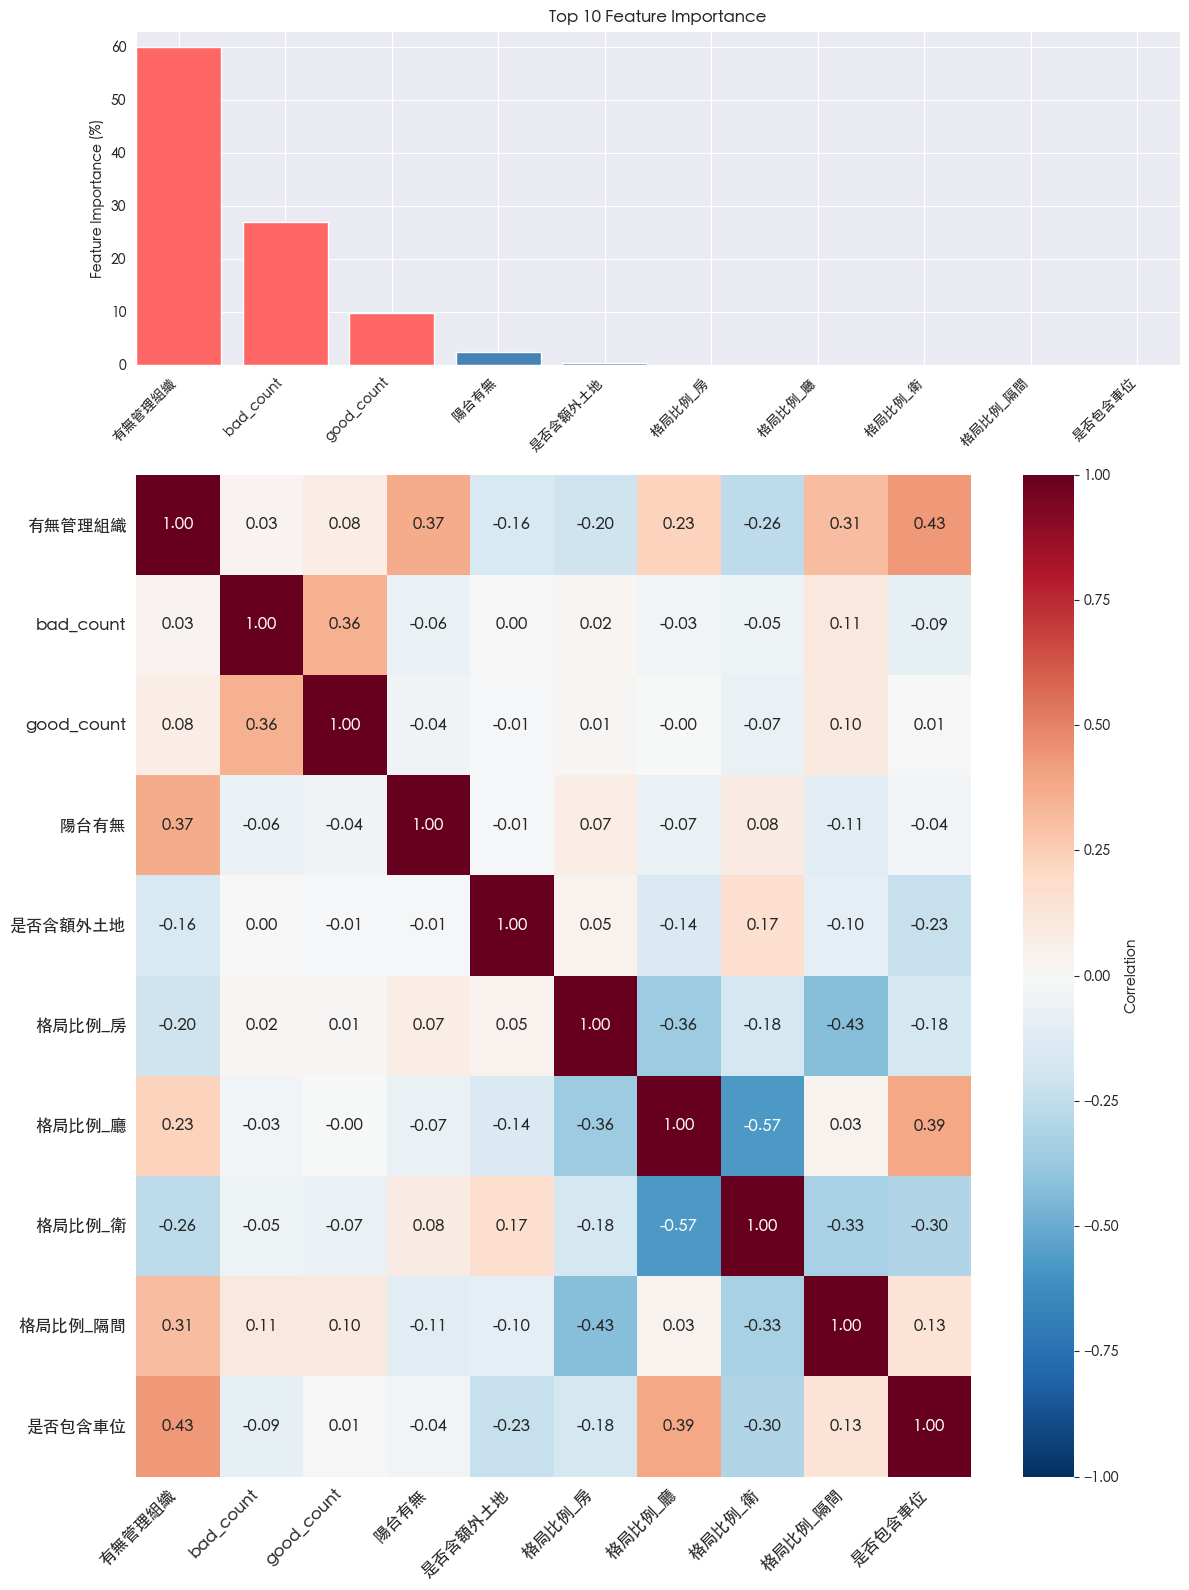

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设您已经有 df、X、feature_importances 这些变量

# 1. 更新 selected_features
selected_features = [
    '房地總價元(坪)', '建物移轉總面積坪', '陽台有無', '交易年份', 'bad_count_500_1000',
    '格局比例_衛', 'bad_count_1000_1500', '土地用途_農', '建築完成年', 'bad_count',
    'good_count_1000_1500', 'bad_count_0_500', '建築型態_其他', '移轉層次_一二樓',
    '格局比例_房', 'good_count_500_1000', '格局比例_廳', '屋齡區間_3年以上－未滿12年',
    '土地用途_工', '格局比例_隔間', '建材種類_未知', '移轉層次_未知', 'good_count_0_500',
    '建材種類_鋼骨', '建築型態_透天厝', '是否含額外土地', 'good_count', '建材種類_磚石',
    '屋齡區間_12年以上－未滿21年', '土地用途_住', '土地用途_未知', '屋齡區間_未滿3年',
    '屋齡區間_30年以上', '建材種類_鋼筋', '土地用途_商', '是否包含車位',
    '建材種類_竹木', '屋齡區間_21年以上－未滿30年', '有無電梯', '有無管理組織',
    '移轉層次_騎樓', '建築型態_住商大樓', '建築型態_公寓', '移轉層次_屋頂'
]

# 2. 确保 df 包含所有 selected_features
missing_features = [feature for feature in selected_features if feature not in df.columns and feature in X.columns]
if missing_features:
    print("以下特征在 df 中不存在，将从 X 中添加：", missing_features)
    df = df.join(X[missing_features], how='left')
else:
    print("所有特征都已存在于 df 中。")

# 检查是否还有缺失的特征
still_missing = [feature for feature in selected_features if feature not in df.columns]
if still_missing:
    print("以下特征在 df 和 X 中均不存在，可能需要检查数据处理流程：", still_missing)

# 3. 计算相关性矩阵
correlation_matrix = df[selected_features].corr()

features = X.columns
importance = feature_importances * 100  # 将特征重要性百分比化

# 排序特征和重要性
sorted_idx = np.argsort(importance)[::-1]  # 降序排列
sorted_features = features[sorted_idx]
sorted_importance = importance[sorted_idx]

# 选择前 10 个特征
top_n = 10
sorted_features_top_n = sorted_features[:top_n]
sorted_importance_top_n = sorted_importance[:top_n]

# 更新 selected_features
selected_features = list(sorted_features_top_n)
print("选取的前 10 个特征：", selected_features)

# 2. 确保 df 包含所有 selected_features
missing_features = [feature for feature in selected_features if feature not in df.columns]
if missing_features:
    print("以下特征在 df 中不存在，将从 X 中添加：", missing_features)
    df = df.join(X[missing_features], how='left')
else:
    print("所有特征都已存在于 df 中。")

# 检查是否还有缺失的特征
still_missing = [feature for feature in selected_features if feature not in df.columns]
if still_missing:
    print("以下特征在 df 和 X 中均不存在，可能需要检查数据处理流程：", still_missing)

# 3. 计算相关性矩阵
correlation_matrix = df[selected_features].corr()

# 4. 绘制特征重要性和相关性矩阵
fig, (ax_bar, ax_heatmap) = plt.subplots(
    2, 1, gridspec_kw={"height_ratios": [1, 3]}, figsize=(12, 16)
)

# 设置颜色，强调前三名特征
colors = ['steelblue'] * len(sorted_importance_top_n)
colors[:3] = ['#ff6666', '#ff6666', '#ff6666']  # 强调前三名特征

# 绘制特征重要性柱状图
ax_bar.bar(range(len(sorted_importance_top_n)), sorted_importance_top_n, color=colors)
ax_bar.set_ylabel("Feature Importance (%)")
ax_bar.set_xticks(range(len(sorted_features_top_n)))
ax_bar.set_xticklabels(sorted_features_top_n, rotation=45, ha='right')
ax_bar.set_title('Top 10 Feature Importance')

# 调整柱状图布局
ax_bar.margins(x=0)

# 绘制相关性矩阵热图
sns.heatmap(
    correlation_matrix, annot=True, fmt=".2f", cmap="RdBu_r", center=0,
    ax=ax_heatmap, cbar_kws={'label': 'Correlation'}, vmin=-1, vmax=1,
    xticklabels=selected_features, yticklabels=selected_features, annot_kws={"size": 12}
)

# 旋转 x 轴和 y 轴标签
ax_heatmap.set_xticklabels(ax_heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax_heatmap.set_yticklabels(ax_heatmap.get_yticklabels(), rotation=0, fontsize=12)

# 调整布局
plt.tight_layout()
plt.show()
